# Pandas Leistungsnachweis

## Inhaltsverzeichnis
1. Fragestellung und Datenbeschaffung
2. Daten laden
3. Daten vorbereiten
4. Statistik der Rohdaten (Generell im Longformat)
5. Analyse der Daten

**Wichtig:** Alle graphischen Darstellungen sollten mindestens *Titel, Ticks- und Achsenbeschriftung* beinhalten (Siehe plots im Leistungsnachweisbeispiel)

## 1. Fragestellungen und Datenbeschaffung
### 1.1 Titel: 
- "Mütterliche Sterblichkeitsraten der Weltbevölkerung"
### 1.2 Fragestellung:
- "Welche zehn Länder zeigen durchschnittlich in den letzten 20 Jahren die höchste müttlerliche Sterblichkeitsrate? Was sind mögliche Gründe für Veränderungen dieser Zahlen?"   
### 1.3 Datenquellen:
- [Maternal-Mortality](https://ourworldindata.org/maternal-mortality)





### 1.4 Daten beschaffen und laden

In [16]:
import pandas as pd
from matplotlib import pyplot as plt

In [17]:
# Daten laden
data = pd.read_csv('number-of-maternal-deaths-by-region.csv', skiprows=1,
                 names=['Entity','Code','Year','Estimated maternal deaths']) 
data.head()

,Entity,Code,Year,Estimated maternal deaths
0,Afghanistan,AFG,1985,10258.5340
1,Afghanistan,AFG,1986,8671.9210
2,Afghanistan,AFG,1987,8488.9600
3,Afghanistan,AFG,1988,7522.1216
4,Afghanistan,AFG,1989,7549.7050


## 2. Daten vorbereiten 
- Welches Format hat mein Datensatz bzw. wie sind meine Kolumnen strukturiert?
    - Meine Daten sind im long-Format und werden später zur besseren Visualisierung in das wide-Format gebracht.
- Welches Format kann ich für welche Teilschritte verwenden (wann soll ich pivot bzw. wide format verwenden)?
- Welche Datentypen kommen in meinem Datensatz vor?

In [18]:
# Filtern der Daten auf die Jahre 2000 bis 2020
filtered_data = data[(data['Year'] >= 2000) & (data['Year'] <= 2020)]

# Zusammenfassung der gefilterten Daten
filtered_data.describe()

,Year,Estimated maternal deaths
count,4116.000000,4116.000000
mean,2010.000000,7274.978239
std,6.056036,36484.600597
min,2000.000000,0.061462
25%,2005.000000,7.900938
50%,2010.000000,99.305623
75%,2015.000000,1390.694150
max,2020.000000,446425.970000


In [14]:
# Durchschnittliche mütterliche Todesfälle pro Land berechnen
average_deaths = (filtered_data.groupby('Entity')['Estimated maternal deaths']
    .mean()
    .sort_values(ascending=False)
    .head(16)
)

# Die 10 Länder mit den höchsten durchschnittlichen Sterblichkeitsraten
top_countries = average_deaths.index.tolist()
average_deaths


Entity
World                            356473.931905
Lower-middle-income countries    222403.123333
Africa                           220357.256190
Asia                             125165.618381
Low-income countries             114737.353190
Nigeria                           73665.903333
India                             56552.621762
Ethiopia                          20456.230905
Democratic Republic of Congo      17854.712667
Upper-middle-income countries     17845.953452
Pakistan                          14991.813190
Indonesia                         11016.817724
Afghanistan                       10787.685548
Bangladesh                        10043.955048
Tanzania                           8298.528838
Kenya                              7114.671424
Name: Estimated maternal deaths, dtype: float64

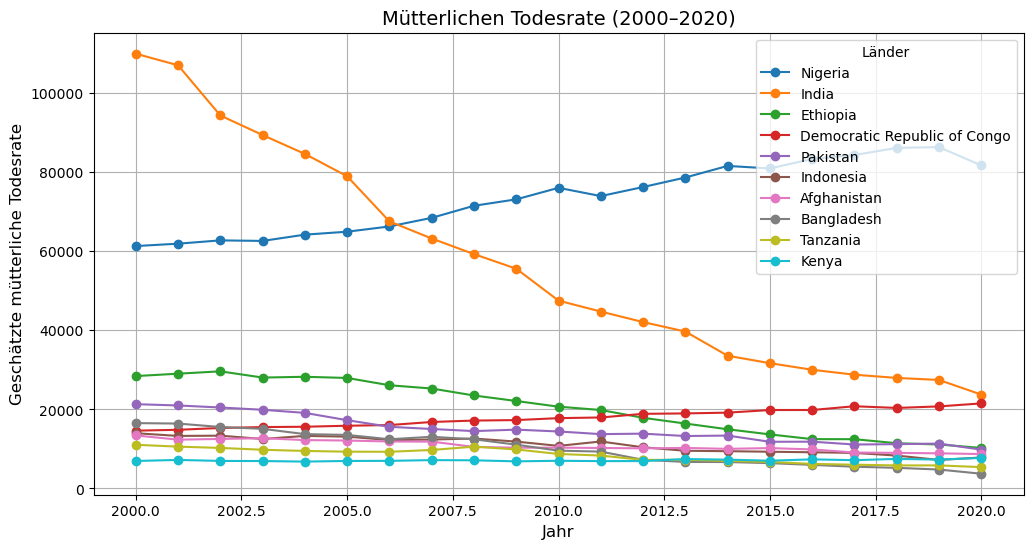

In [19]:
# Daten für spezifische Länder filtern
specific_countries = ["Nigeria", "India", "Ethiopia", "Democratic Republic of Congo", "Pakistan", "Indonesia", "Afghanistan", "Bangladesh", "Tanzania", "Kenya"]
country_data = filtered_data[filtered_data['Entity'].isin(specific_countries)]

# Visualisierung der Entwicklung
plt.figure(figsize=(12, 6))
for country in specific_countries:
    subset = country_data[country_data['Entity'] == country]
    plt.plot(subset['Year'], subset['Estimated maternal deaths'], label=country, marker='o')

# Diagramm anpassen
plt.title('Mütterlichen Todesrate (2000–2020)', fontsize=14)
plt.xlabel('Jahr', fontsize=12)
plt.ylabel('Geschätzte mütterliche Todesrate', fontsize=12)
plt.legend(title='Länder')
plt.grid(True)
plt.show()

## 3. Statistik der Rohdaten (Analyse im Long-Format)
- Ist meine Variable kontinuierlich oder diskret? Falls diskret, wieviele einzigartige Klassen gibt es? Wieviele Datenpunkte pro Klasse sind vorhanden?
- Anzahl Datenpunkte (Beschreibend und Graphische Darstellung)
    - Wieviele Datenpunkte sind für die bestimmten Variabeln vorhanden?
    - Wo fehlen Datenpunkte?
- Wie ist die Verteilung der zu untersuchenden Variabel(n) (Histogram, Boxplot, Säulendiagram)
- Vermutest du Zusammenhänge zwischen zwei Variabeln (Streuungsdiagramm, Korrelationsmatrix)

*Notiz: Zu jeder Kolumne sollte generell eine Aussage möglich sein.*

## 4. Analyse 

### Vorgehen
- Spezifische Untersuchung der Fragestellung (Berechnungen)
- Visualisieren der Resultate: Verwendet Achsenbeschriftung und überlegt euch, welche Art von Darstellung sinnvoll ist (Kuchen-, Säulen, Liniendiagramm; 2 y-Achsen?)
- Beschreiben der Beobachtungen
- Interpretation der Resultate (Hypothesen zu den Resultaten)
- Untermauern der Interpretation mittels Hinweise zur Literatur (Mögliche Zusammenhänge aufzeigen).

